In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Read the main image and template
img = cv2.imread('demo6_images/connectors.png')
template = cv2.imread('demo6_images/connector_pattern.png')

# Convert images to RGB for proper display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)


1. Simple Template Matching

Trying method: TM_SQDIFF


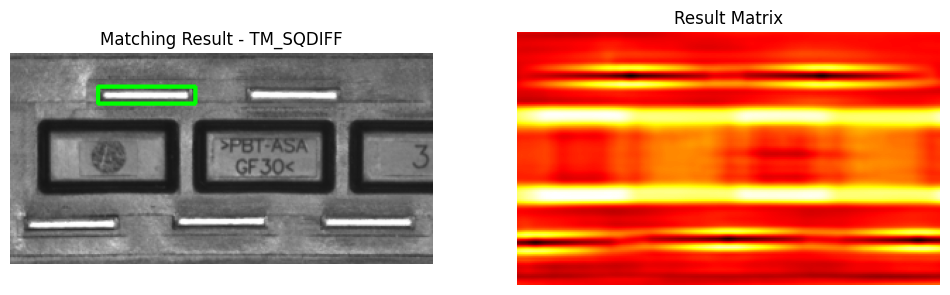

Trying method: TM_SQDIFF_NORMED


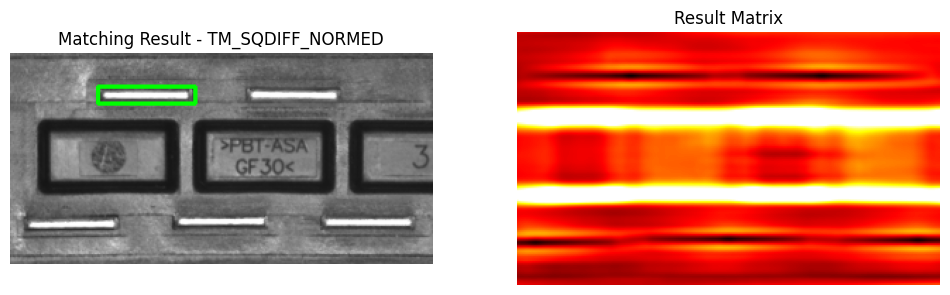

Trying method: TM_CCORR


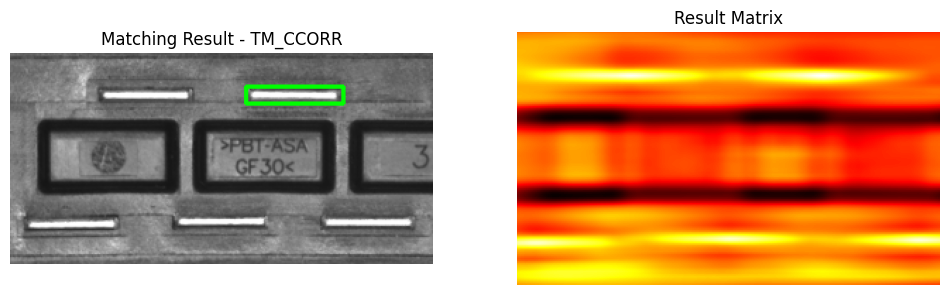

Trying method: TM_CCORR_NORMED


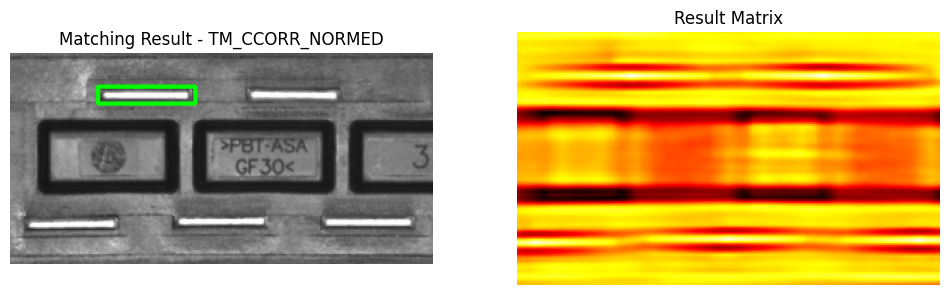

Trying method: TM_CCOEFF


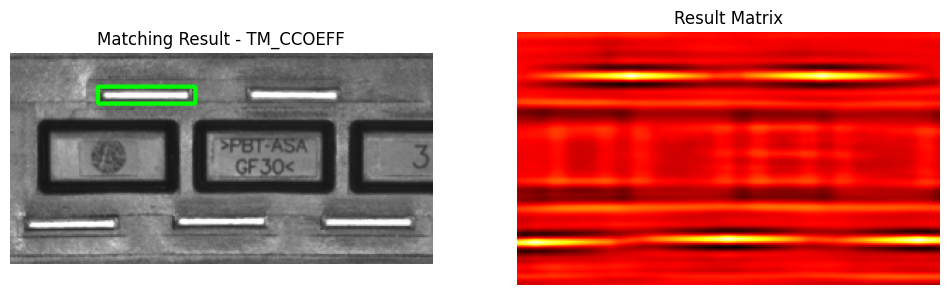

Trying method: TM_CCOEFF_NORMED


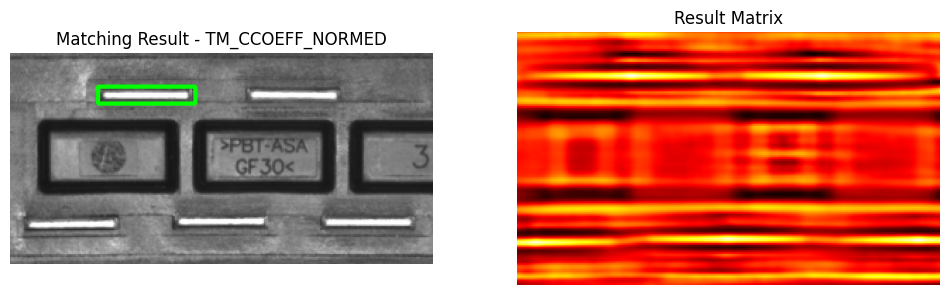

In [12]:
# Best Match - All Methods 

# Convert images to RGB for proper display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

def template_matching(img_rgb, template_rgb):
    # List of methods to try
    methods = [
        ('TM_SQDIFF', cv2.TM_SQDIFF),
        ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
        ('TM_CCORR', cv2.TM_CCORR),
        ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
        ('TM_CCOEFF', cv2.TM_CCOEFF),
        ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED)
    ]

    # Loop through each method
    for method_name, method in methods:
        print(f"Trying method: {method_name}")
        
        # Apply template matching
        result = cv2.matchTemplate(img_rgb, template_rgb, method)
        
        # Find the best match position
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
            
        # Get template dimensions
        h, w = template_rgb.shape[:2]
        bottom_right = (top_left[0] + w, top_left[1] + h)
        
        # Draw rectangle on a copy of the image
        img_copy = img_rgb.copy()
        cv2.rectangle(img_copy, top_left, bottom_right, (0, 255, 0), 2)
        
        # Plot the results
        plt.figure(figsize=(12, 4))
        
        # Plot original image with matched region
        plt.subplot(121)
        plt.imshow(img_copy)
        plt.title(f'Matching Result - {method_name}')
        plt.axis('off')
        
        # Plot the matching result matrix
        plt.subplot(122)
        plt.imshow(result, cmap='hot')
        plt.title('Result Matrix')
        plt.axis('off')
        
        plt.show()

template_matching(img_rgb, template_rgb)

Auxiliary Functions 

In [14]:
def template_matching_single_method(img_rgb, template_rgb, method_number):
    """
    Apply template matching using a single method.
    Methods needs to be specified as an argument. 
    """
    # List of methods to try
    methods = [
        ('TM_SQDIFF', cv2.TM_SQDIFF),
        ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
        ('TM_CCORR', cv2.TM_CCORR),
        ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
        ('TM_CCOEFF', cv2.TM_CCOEFF),
        ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED)
    ]

    # Ensure method_number is within the valid range
    if method_number < 0 or method_number >= len(methods):
        raise ValueError("Invalid method_number. It should be between 0 and 5.")

    # Get the method based on method_number
    method_name, method = methods[method_number]
    #print(f"Trying method: {method_name}")
    
    # Apply template matching
    result = cv2.matchTemplate(img_rgb, template_rgb, method)
    
    return result 
    

In [11]:
def plotBestResult(result, img_rgb, template_rgb):
    """
    Plot the best matching result on the image.
    
    Parameters:
    - result: The result from the template_matching_single_method function.
    - img_rgb: The original image.
    - template_rgb: The template image.
    """
    # Find the best match location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    # Determine the top-left corner of the bounding box
    top_left = min_loc if cv2.TM_SQDIFF in result else max_loc
    
    # Determine the bottom-right corner of the bounding box
    h, w = template_rgb.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Draw the bounding box on a copy of the original image
    img_copy = img_rgb.copy()
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 255, 0), 2)
    
    # Plot the image with the bounding box
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title('Best Match Result')
    plt.axis('off')
    plt.show()

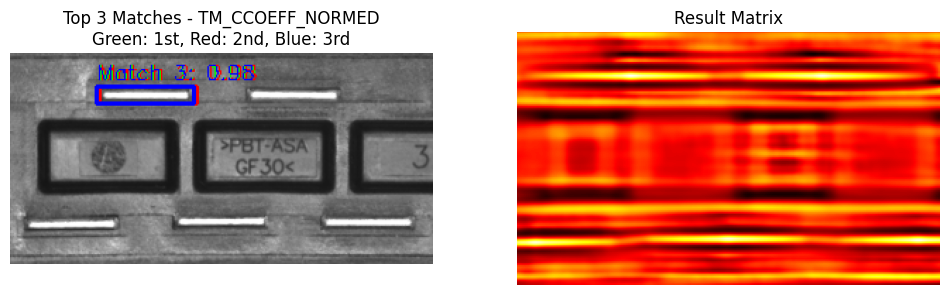

In [3]:
# 3 Best matches 

def find_top3_matches(img_path, template_path, method='TM_CCOEFF_NORMED'):
    """
    Find top 3 matches of a template in an image using template matching.
    
    Parameters:
    - img_path: path to the main image
    - template_path: path to the template image
    - method: template matching method (default: TM_CCOEFF_NORMED)
             Options: 'TM_SQDIFF', 'TM_SQDIFF_NORMED', 'TM_CCORR', 
                     'TM_CCORR_NORMED', 'TM_CCOEFF', 'TM_CCOEFF_NORMED'
    """
    # Dictionary of methods
    method_dict = {
        'TM_SQDIFF': cv2.TM_SQDIFF,
        'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED,
        'TM_CCORR': cv2.TM_CCORR,
        'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
        'TM_CCOEFF': cv2.TM_CCOEFF,
        'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED
    }
    
    # Read images
    img = cv2.imread(img_path)
    template = cv2.imread(template_path)
    
    # Convert to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
    
    # Get template dimensions
    h, w = template_rgb.shape[:2]
    
    # Apply template matching
    result = cv2.matchTemplate(img_rgb, template_rgb, method_dict[method])
    
    # Create copy for drawing
    img_copy = img_rgb.copy()
    
    # Find top 3 matches
    result_flatten = result.flatten()
    if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
        # For these methods, smaller values are better
        top_3_idx = np.argsort(result_flatten)[:3]
    else:
        # For other methods, larger values are better
        top_3_idx = np.argsort(result_flatten)[-3:][::-1]
    
    match_values = result_flatten[top_3_idx]
    
    # Convert indices to positions
    rows, cols = result.shape
    top_3_positions = [(idx % cols, idx // cols) for idx in top_3_idx]
    
    # Colors for rectangles (RGB)
    colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255)]  # Green, Red, Blue
    
    # Draw rectangles and add text
    for i, (top_left, match_val) in enumerate(zip(top_3_positions, match_values)):
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img_copy, top_left, bottom_right, colors[i], 2)
        
        # Add match value text
        text_pos = (top_left[0], top_left[1] - 5)
        cv2.putText(img_copy, f'Match {i+1}: {match_val:.2f}', 
                    text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[i], 1)
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.imshow(img_copy)
    plt.title(f'Top 3 Matches - {method}\nGreen: 1st, Red: 2nd, Blue: 3rd')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(result, cmap='hot')
    plt.title('Result Matrix')
    plt.axis('off')
    
    plt.show()
    
    # Return positions and match values
    #return top_3_positions, match_values

find_top3_matches('demo6_images/connectors.png', 'demo6_images/connector_pattern.png', method='TM_CCOEFF_NORMED')

2. Non - Maximum Suppression

h: , w:  12   69


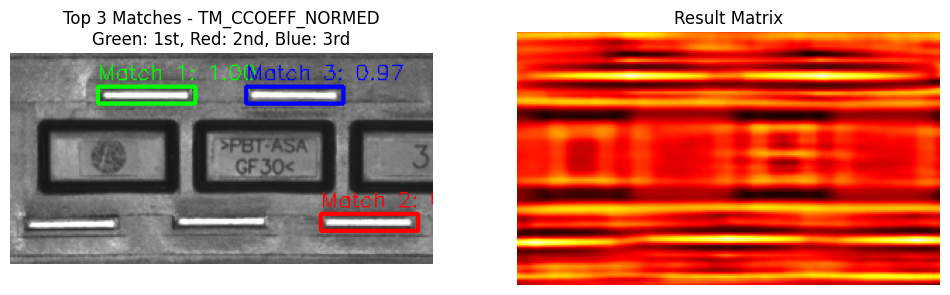

In [ ]:
# 3 Best matches with non-maximum suppression

def IoU(box1, box2):
    """
    Compute Intersection over Union (IoU) between two bounding boxes.
    Each box is defined by (x, y, width, height).
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Compute overlap coordinates
    x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    
    intersection = x_overlap * y_overlap
    union = w1 * h1 + w2 * h2 - intersection

    return intersection / union if union != 0 else 0

def non_max_suppression(matches, threshold=0.5, w=50, h=50):
    """
    Perform Non-Maximum Suppression (NMS) to remove overlapping matches.
    
    Parameters:
    - matches: List of matches as [(x, y, score), ...]
    - threshold: IoU threshold for suppression.
    """
    if not matches:
        return []

    # Sort matches by score in descending order
    matches = sorted(matches, key=lambda x: x[2], reverse=True)
    nms_matches = []

    while matches:
        # Select the match with the highest score
        best_match = matches.pop(0)
        nms_matches.append(best_match)

        # Remove matches that overlap significantly with the best match
        matches = [
            match for match in matches 
            if IoU((best_match[0], best_match[1], w, h), (match[0], match[1], w, h)) < threshold
        ]

    return nms_matches

def find_top3_matches_nms(img_path, template_path, method='TM_CCOEFF_NORMED'):
    """
    Find top 3 matches of a template in an image using template matching.
    
    Parameters:
    - img_path: path to the main image
    - template_path: path to the template image
    - method: template matching method (default: TM_CCOEFF_NORMED)
             Options: 'TM_SQDIFF', 'TM_SQDIFF_NORMED', 'TM_CCORR', 
                     'TM_CCORR_NORMED', 'TM_CCOEFF', 'TM_CCOEFF_NORMED'
    """
    method_dict = {
        'TM_SQDIFF': cv2.TM_SQDIFF,
        'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED,
        'TM_CCORR': cv2.TM_CCORR,
        'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
        'TM_CCOEFF': cv2.TM_CCOEFF,
        'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED
    }
    
    img = cv2.imread(img_path)
    template = cv2.imread(template_path)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

    h, w = template_rgb.shape[:2]
    print("h: , w: ",h,' ', w)
    #w, h = template.shape[::-1]  # Assuming template is the template image

    # Apply template matching
    result = cv2.matchTemplate(img_rgb, template_rgb, method_dict[method])

    # Flatten the result matrix to extract match positions and scores
    result_flatten = result.flatten()
    rows, cols = result.shape

    if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
        top_idx = np.argsort(result_flatten)[:10]  # Get top 10 (smallest) scores
    else:
        top_idx = np.argsort(result_flatten)[-10:][::-1]  # Get top 10 (largest) scores

    # Convert indices to (x, y) positions and extract scores
    matches = [(idx % cols, idx // cols, result_flatten[idx]) for idx in top_idx]

    # Apply Non-Maximum Suppression
    nms_matches = non_max_suppression(matches, threshold=0.5,w=w,h=h)

    # Take the top 3 matches after NMS
    top_3_matches = nms_matches[:3]

    # Colors for rectangles (RGB)
    colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255)]  # Green, Red, Blue

    # Create a copy for drawing
    img_copy = img_rgb.copy()

    # Draw rectangles and add text for the top 3 matches
    for i, (x, y, score) in enumerate(top_3_matches):
        bottom_right = (x + w, y + h)
        cv2.rectangle(img_copy, (x, y), bottom_right, colors[i], 2)

        text_pos = (x, y - 5)
        cv2.putText(img_copy, f'Match {i+1}: {score:.2f}', 
                    text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[i], 1)

    # Plot the results
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.imshow(img_copy)
    plt.title(f'Top 3 Matches - {method}\nGreen: 1st, Red: 2nd, Blue: 3rd')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(result, cmap='hot')
    plt.title('Result Matrix')
    plt.axis('off')

    plt.show()

    # Return positions and scores
    #return [(x, y) for x, y, _ in top_3_matches], [score for _, _, score in top_3_matches]

find_top3_matches_nms('demo6_images/connectors.png', 'demo6_images/connector_pattern.png', method='TM_CCOEFF_NORMED')


4. Template matching using image pyramids 

Trying method: TM_SQDIFF


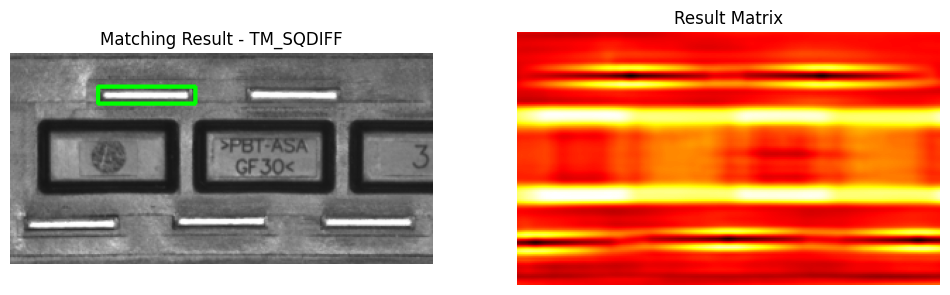

Trying method: TM_SQDIFF_NORMED


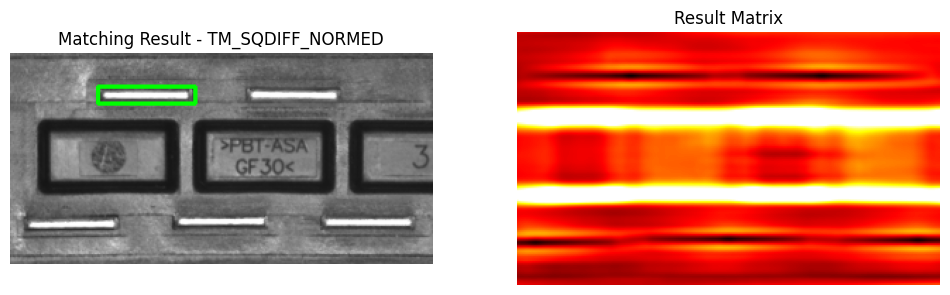

Trying method: TM_CCORR


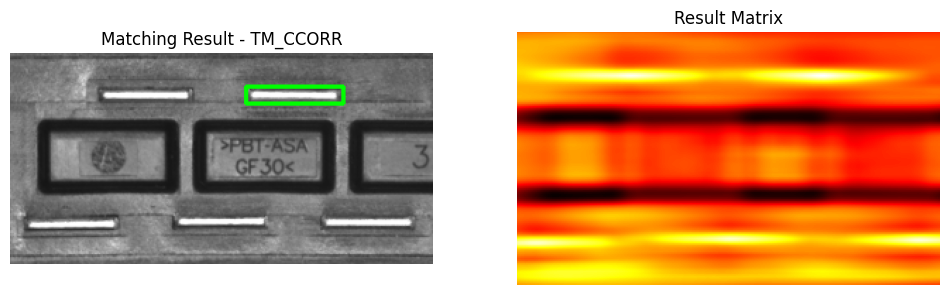

Trying method: TM_CCORR_NORMED


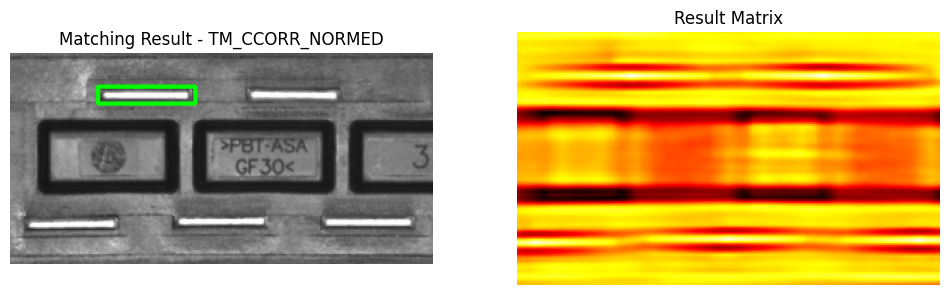

Trying method: TM_CCOEFF


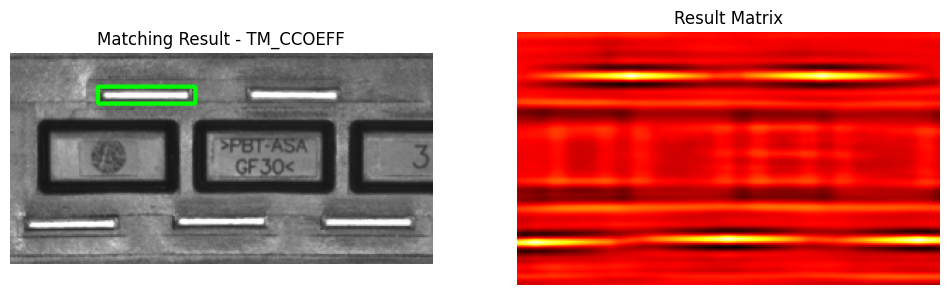

Trying method: TM_CCOEFF_NORMED


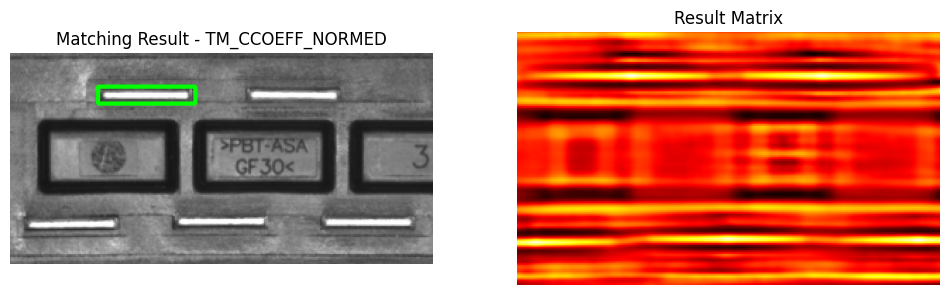

Trying method: TM_SQDIFF


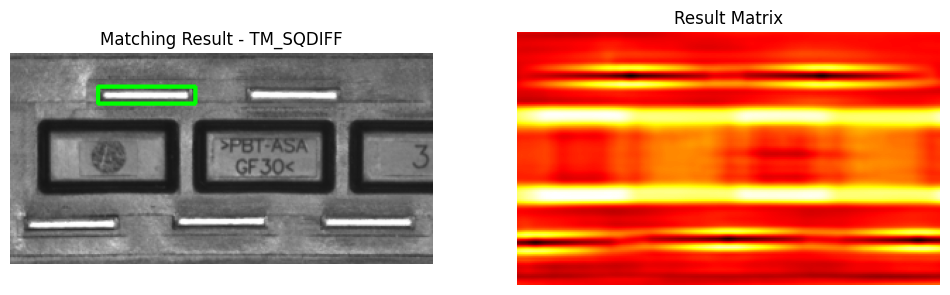

Trying method: TM_SQDIFF_NORMED


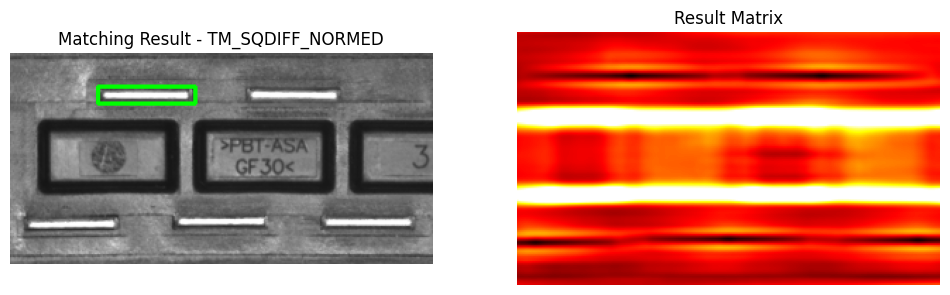

Trying method: TM_CCORR


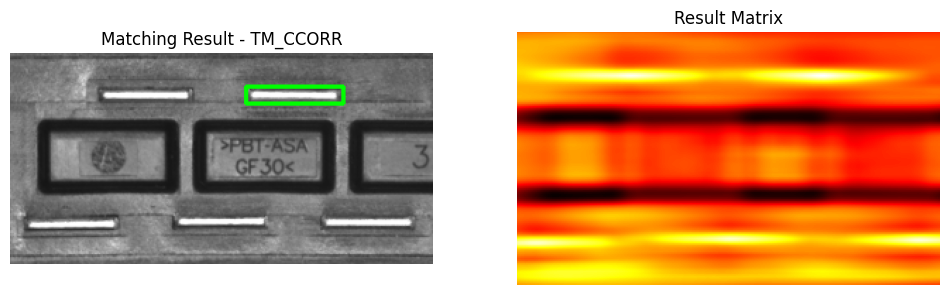

Trying method: TM_CCORR_NORMED


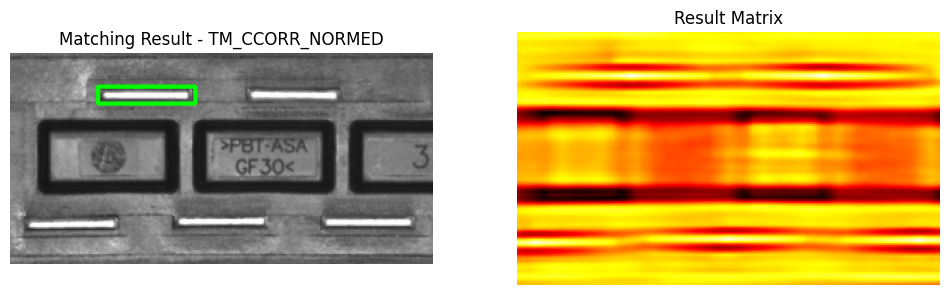

Trying method: TM_CCOEFF


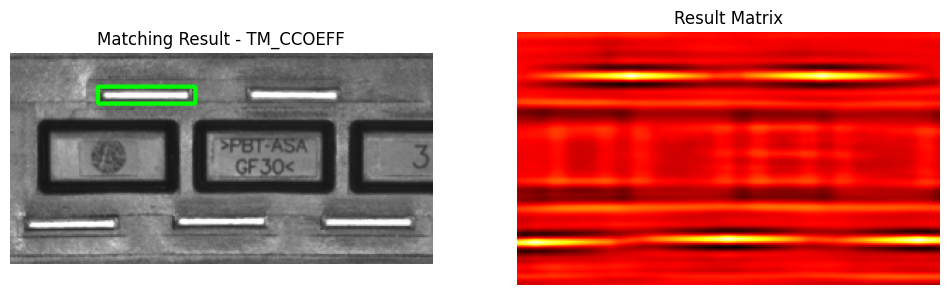

Trying method: TM_CCOEFF_NORMED


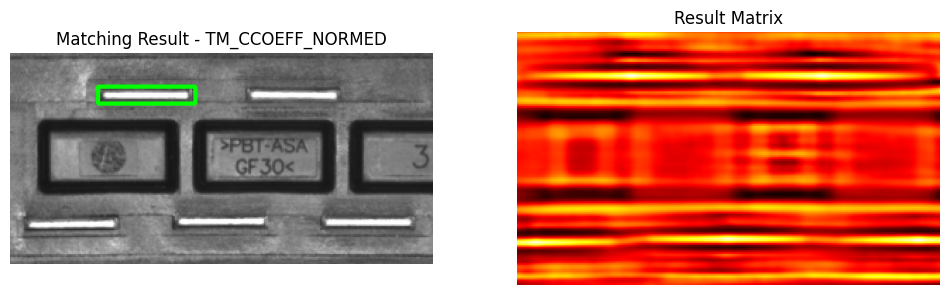

Time taken for original images: 1.0309357643127441 seconds
Trying method: TM_SQDIFF


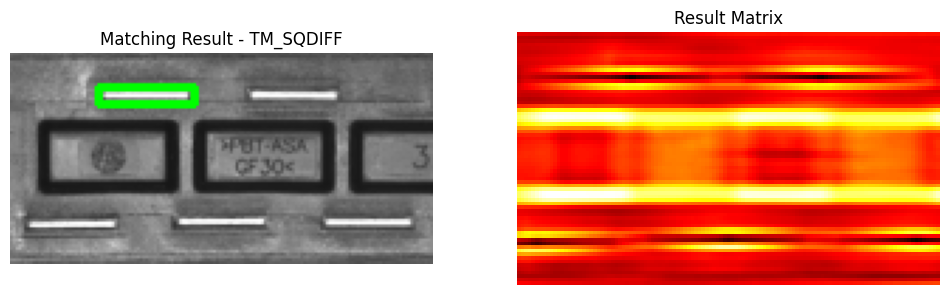

Trying method: TM_SQDIFF_NORMED


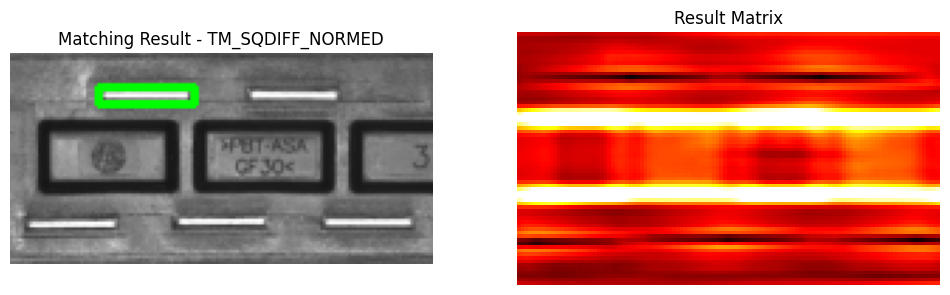

Trying method: TM_CCORR


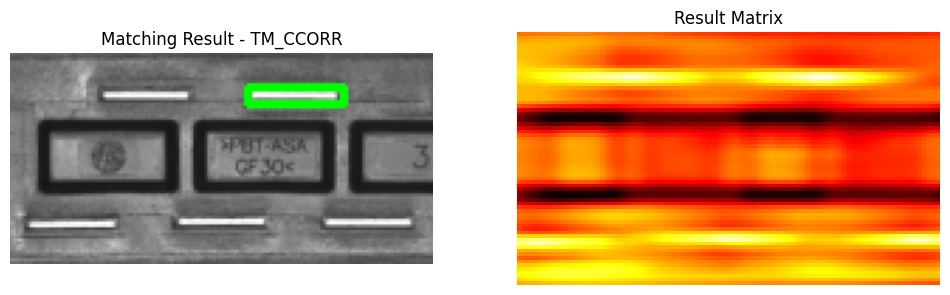

Trying method: TM_CCORR_NORMED


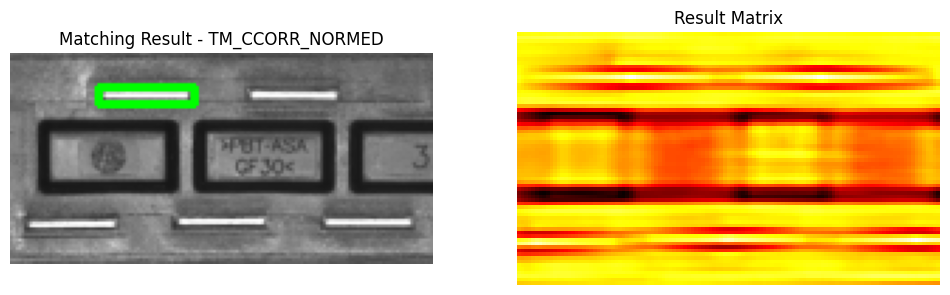

Trying method: TM_CCOEFF


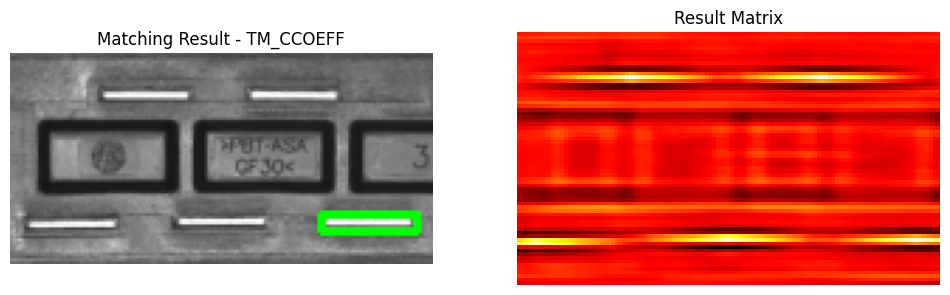

Trying method: TM_CCOEFF_NORMED


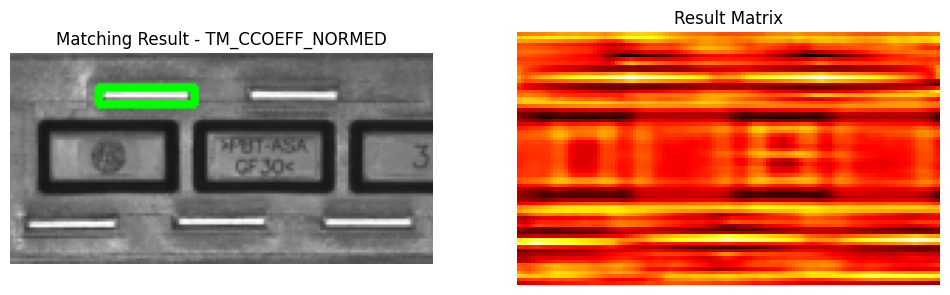

Time taken for resized images: 0.9165661334991455 seconds


In [27]:
scale = 0.5  # Scale factor for downsampling

# Resize the template
h, w = template.shape[:2]
new_h, new_w = int(h * scale), int(w * scale)
resized_template = cv2.resize(template, (new_w, new_h))

# Resize the image
h, w = img.shape[:2]
new_h, new_w = int(h * scale), int(w * scale)
resized_img = cv2.resize(img, (new_w, new_h))

# Convert images to RGB
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_template = cv2.cvtColor(resized_template, cv2.COLOR_BGR2RGB)

# Perform template matching on the raw images using template_matching function 
template_matching(img,template)
start_time = time.time()
template_matching(img, template)
end_time = time.time()
print(f"Time taken for original images: {end_time - start_time} seconds")

start_time = time.time()
template_matching(resized_img, resized_template)
end_time = time.time()
print(f"Time taken for resized images: {end_time - start_time} seconds")

5. Scale & Rotation

In [ ]:
angle = 45 # degrees

# Rotate the image
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))

# Run template matching on the rotated image
template_matching(rotated_img, template)


In [ ]:
scale = 1.5 # Scale factor

# scale the image
h, w = img.shape[:2]
new_h, new_w = int(h * scale), int(w * scale)
scaled_img = cv2.resize(img, (new_w, new_h))

# Run template matching on the scaled image
template_matching(scaled_img, template)